In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split


data = fetch_mldata('MNIST original')
X = data['data'].astype(np.float32)
y = data['target']

ind = np.arange(X.shape[0])
np.random.shuffle(ind)
ind = ind[:10000]
X = X[ind, :]
y = y[ind]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 784), (2000,), (8000, 784), (8000,))

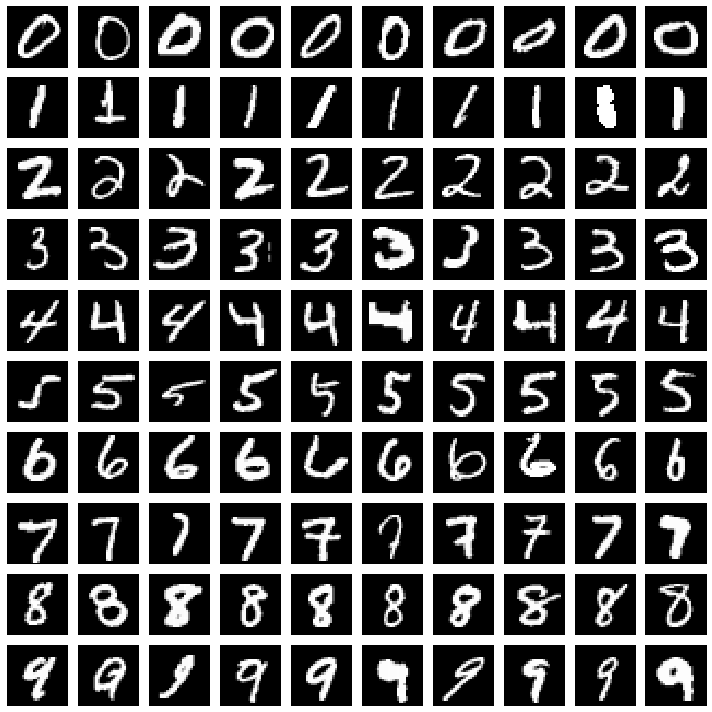

In [36]:
C = 10
columns = 10
fig, axes = plt.subplots(C, columns, sharey=True, figsize=(columns, C))
for c in range(C):
    ids = np.where(y == c)[0]
    np.random.shuffle(ids)
    for col in range(columns):
        axes[c][col].imshow(X[ids[col]].reshape(28, 28), interpolation='nearest', cmap='gray')
        axes[c][col].get_xaxis().set_visible(False)
        axes[c][col].get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

---

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=10**-6, solver='lbfgs')
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

precision_train = np.mean(pred_train == y_train)
precision_test = np.mean(pred_test == y_test)
print('Precision. Train: %.4f%%, Test: %.4f%%' % (precision_train * 100.0, precision_test * 100.0))



Precision. Train: 91.8000%, Test: 88.3875%


In [61]:
from sklearn.metrics import roc_auc_score

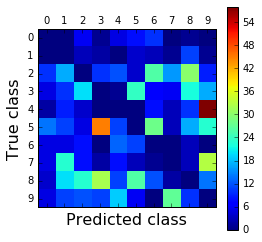

array([[ 0,  0,  6,  1,  5,  8, 10,  0,  1,  0],
       [ 0,  0,  3,  2,  0,  4,  3,  1, 11,  1],
       [10, 17,  0, 10, 12,  4, 26, 16, 30,  9],
       [ 5, 10, 20,  0,  1, 24,  7,  6, 22, 17],
       [ 2,  9,  4,  0,  0,  0,  8,  3, 10, 58],
       [14, 11,  5, 45, 11,  0, 28,  3, 17, 23],
       [ 5,  5,  8,  0, 13, 11,  0,  0,  3,  0],
       [ 5, 23,  8,  2,  8,  3,  1,  0,  3, 33],
       [ 4, 20, 23, 32, 11, 26, 12,  2,  0, 14],
       [ 5, 11, 12, 11, 19,  6,  0, 27, 10,  0]])

In [64]:
from sklearn.metrics import confusion_matrix

m = confusion_matrix(y_test, pred_test)
m[np.arange(10), np.arange(10)] = 0

plt.matshow(m)
plt.colorbar()
plt.xticks(np.arange(C))
plt.yticks(np.arange(C))
plt.ylabel('True class', fontsize=16)
plt.xlabel('Predicted class', fontsize=16)
plt.show()
m

---

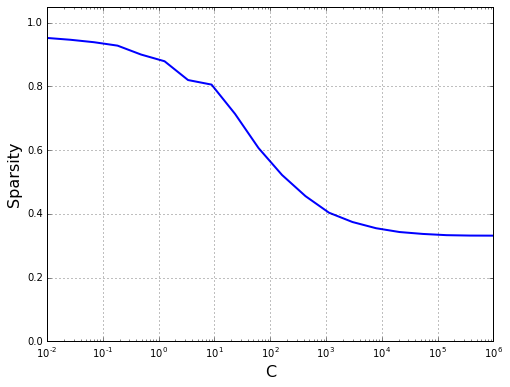

In [72]:
C_list = np.logspace(-2, 6, 20)
sparsity = []
for C_value in C_list:
    model = LogisticRegression(penalty='l1', C=C_value)
    model.fit(X_train[:200], y_train[:200])
    sparsity.append(np.mean(np.abs(model.coef_) < 1e-6))
plt.figure(figsize=(8, 6))
plt.semilogx(C_list, sparsity, linewidth=2)
plt.ylim([0.0, 1.05])
plt.ylabel('Sparsity', fontsize=16)
plt.xlabel('C', fontsize=16)
plt.grid()
plt.show()